# Perform evaluation on the data

## assumptions 
The data will be returns an 1-dimension tensor (array) of the predictions for all the test images. 
This could then be compared against the labels to calculate the error 

In [3]:
import torch
import torchvision
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

Dummy Calculated Results: tensor([ 2, 19, 18, 25, 16,  3,  7,  6,  8,  9, 11, 13, 16, 11,  2,  4, 27,  4,
        12,  5, 21, 14, 11, 18, 24, 15,  0, 17, 17, 25])
Dummy Expected Results: tensor([ 2, 19, 18, 25, 16,  4,  7,  6,  8,  9, 11, 13, 16, 11,  2,  4, 27,  4,
        12,  5, 23, 14, 11, 18, 24, 16,  0, 17, 17, 25])


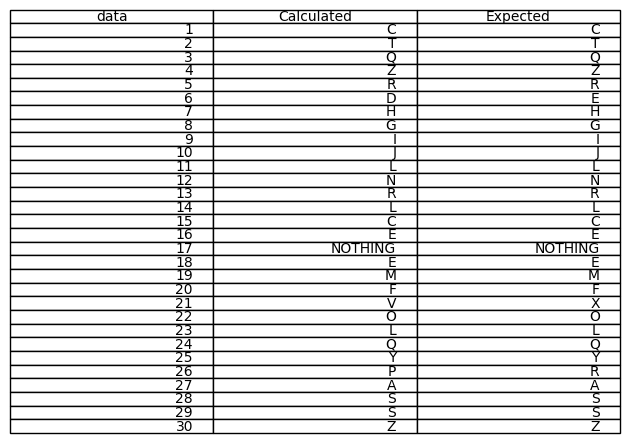

In [32]:
# usefull variables for the entire thing 
categories = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "R", "S",
             "Q", "T", "U", "V", "W", "X", "Y", "Z", "SPACE", "NOTHING", "DELETE"]

# create some dummy test code 
n = 30
expected = torch.randint(0, 29, (n,))
calculated = expected.clone().detach()

mask = torch.randn(n)
for i in range(0, n, 5):
    calculated[i] += (mask.int())[i]
    calculated[i] = min(28, calculated[i])
    
#calculated += mask.int()
#calculated = torch.clamp(calculated, max=28)

print(f"Dummy Calculated Results: {calculated}")
print(f"Dummy Expected Results: {expected}")

# print out the data in a form that's readible 
fig, ax = plt.subplots()

fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

calculated_format = []
expected_format = []
for i in range(0, n): 
    calculated_format.append(categories[calculated[i]])
    expected_format.append(categories[expected[i]])

df = pd.DataFrame({"data":list(range(1, n + 1)), "Calculated":calculated_format, "Expected":expected_format})

ax.table(cellText=df.values, colLabels=df.columns, loc='center')

fig.tight_layout()

plt.show()

In [33]:
# assume that both inputs are tensors
def calculate_accuracy(output, expected):
    correct_predictions = 0 
    n = output.shape[0]
    for i in range(n):
        if output[i] == expected[i]: 
            correct_predictions += 1

    return float(correct_predictions) / float(output.shape[0])

print(f"The Accuracy: {calculate_accuracy(calculated, expected)}")

The Accuracy: 0.9


In [36]:
# perform multiclass f1 classification 

def individual_f1(output, expected, category):
    true_positive = 0
    true_negative = 0
    false_positive = 0
    false_negative = 0
    
    # go through all the values and calculate these 
    n = output.shape[0]
    for i in range(n):
        # positive
        if output[i] == category:
            if output[i] == expected[i]:
                true_positive += 1
            else: 
                false_positive += 1
        # negative
        else:
            if output[i] == expected[i]:
                true_negative += 1
            else: 
                false_negative += 1

    try: 
        precision = true_positive / (true_positive + false_positive)
    except ZeroDivisionError:
        precision = 0

    try:
        recall = true_positive / (true_positive + false_negative)
    except ZeroDivisionError:
        recall = 0

    try:
        f1_score = 2 * ((precision * recall) / (precision + recall))
    except ZeroDivisionError:
        f1_score = 0
    
    return f1_score

def F1(output, expected, categories):
    f1_scores = []
    # go through each category and calculate the f1 score for the category
    for category in range(len(categories)): 
        f = individual_f1(output, expected, category)
        f1_scores.append(f)

    # return the f1 scores
    # format as panda frame 
    f1_scores_reformatted = pd.DataFrame({
        "Categories" : categories,
        "F1 Scores" : f1_scores
    })
    return f1_scores_reformatted
    

In [37]:
print(F1(calculated, expected, categories))

   Categories  F1 Scores
0           A   0.400000
1           B   0.000000
2           C   0.571429
3           D   0.000000
4           E   0.571429
5           F   0.400000
6           G   0.400000
7           H   0.400000
8           I   0.400000
9           J   0.400000
10          K   0.000000
11          L   0.666667
12          M   0.400000
13          N   0.400000
14          O   0.400000
15          P   0.000000
16          R   0.571429
17          S   0.571429
18          Q   0.571429
19          T   0.400000
20          U   0.000000
21          V   0.000000
22          W   0.000000
23          X   0.000000
24          Y   0.400000
25          Z   0.571429
26      SPACE   0.000000
27    NOTHING   0.400000
28     DELETE   0.000000
